In [1]:
import pandas as pd

import sys
import os
sys.path.append(os.path.abspath("../"))

from scripts.split_to_nix import split_currency_columns
from scripts.rename import rename_and_add_id
from scripts.convert_ds_to_date import convert_ds_to_date
from scripts.plot_time_series import plot_time_series
from scripts.aggregate_monthly_avg import aggregate_monthly_avg
from scripts.to_float import convert_y_to_float
from scripts.save_to_parquet import save_to_parquet

In [2]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [3]:
df = pd.read_csv("../data/acucar/acucar.csv")

In [7]:
df.head(10)

,Data,À vista R$,À vista US$
0,20/05/2003,"29,65","9,75"
1,21/05/2003,"29,26","9,75"
2,22/05/2003,"28,81","9,66"
3,23/05/2003,"28,35","9,71"
4,26/05/2003,"27,83","9,19"
5,27/05/2003,"27,76","9,16"
6,28/05/2003,"27,48","9,12"
7,29/05/2003,"27,23","9,28"
8,30/05/2003,"27,04","9,1"
9,02/06/2003,"26,74","8,97"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5397 entries, 0 to 5396
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Data         5397 non-null   object
 1   À vista R$   5397 non-null   object
 2   À vista US$  5397 non-null   object
dtypes: object(3)
memory usage: 126.6+ KB


In [6]:
df_brl, df_usd = split_currency_columns(df)

In [7]:
df_brl.head(10)

,Data,À vista R$
0,20/05/2003,"29,65"
1,21/05/2003,"29,26"
2,22/05/2003,"28,81"
3,23/05/2003,"28,35"
4,26/05/2003,"27,83"
5,27/05/2003,"27,76"
6,28/05/2003,"27,48"
7,29/05/2003,"27,23"
8,30/05/2003,"27,04"
9,02/06/2003,"26,74"


In [8]:
df_usd.head(10)

,Data,À vista US$
0,20/05/2003,"9,75"
1,21/05/2003,"9,75"
2,22/05/2003,"9,66"
3,23/05/2003,"9,71"
4,26/05/2003,"9,19"
5,27/05/2003,"9,16"
6,28/05/2003,"9,12"
7,29/05/2003,"9,28"
8,30/05/2003,"9,1"
9,02/06/2003,"8,97"


In [9]:
cols_dict_brl = {
    'Data': 'ds',
    'À vista R$': 'y'
}

cols_dict_usd = {
    'Data': 'ds',
    'À vista US$': 'y'
}

In [10]:
unique_id = 'ACUCAR'
df_brl = rename_and_add_id(df_brl, cols_dict_brl, unique_id)
df_usd = rename_and_add_id(df_usd, cols_dict_usd, unique_id)

In [11]:
df_brl.head(10)

,ds,y,unique_id
0,20/05/2003,"29,65",ACUCAR
1,21/05/2003,"29,26",ACUCAR
2,22/05/2003,"28,81",ACUCAR
3,23/05/2003,"28,35",ACUCAR
4,26/05/2003,"27,83",ACUCAR
5,27/05/2003,"27,76",ACUCAR
6,28/05/2003,"27,48",ACUCAR
7,29/05/2003,"27,23",ACUCAR
8,30/05/2003,"27,04",ACUCAR
9,02/06/2003,"26,74",ACUCAR


In [12]:
df_usd.head(10)

,ds,y,unique_id
0,20/05/2003,"9,75",ACUCAR
1,21/05/2003,"9,75",ACUCAR
2,22/05/2003,"9,66",ACUCAR
3,23/05/2003,"9,71",ACUCAR
4,26/05/2003,"9,19",ACUCAR
5,27/05/2003,"9,16",ACUCAR
6,28/05/2003,"9,12",ACUCAR
7,29/05/2003,"9,28",ACUCAR
8,30/05/2003,"9,1",ACUCAR
9,02/06/2003,"8,97",ACUCAR


In [13]:
df_brl = convert_ds_to_date(df_brl)
df_usd = convert_ds_to_date(df_usd)

df_brl = convert_y_to_float(df_brl)
df_usd = convert_y_to_float(df_usd)

In [14]:
df_brl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5397 entries, 0 to 5396
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ds         5397 non-null   datetime64[ns]
 1   y          5397 non-null   float64       
 2   unique_id  5397 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 126.6+ KB


In [15]:
df_usd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5397 entries, 0 to 5396
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ds         5397 non-null   datetime64[ns]
 1   y          5397 non-null   float64       
 2   unique_id  5397 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 126.6+ KB


In [16]:
df_brl = aggregate_monthly_avg(df_brl)
df_usd = aggregate_monthly_avg(df_usd)

In [17]:
df_brl.head(10)

,ds,y,unique_id
0,2003-05-01,28.156667,ACUCAR
1,2003-06-01,25.092000,ACUCAR
2,2003-07-01,23.928636,ACUCAR
3,2003-08-01,29.410000,ACUCAR
4,2003-09-01,24.313636,ACUCAR
5,2003-10-01,21.140435,ACUCAR
6,2003-11-01,20.375500,ACUCAR
7,2003-12-01,21.424500,ACUCAR
8,2004-01-01,19.659524,ACUCAR
9,2004-02-01,18.176111,ACUCAR


In [18]:
df_usd.head(10)

,ds,y,unique_id
0,2003-05-01,9.413333,ACUCAR
1,2003-06-01,8.710000,ACUCAR
2,2003-07-01,8.300455,ACUCAR
3,2003-08-01,9.794762,ACUCAR
4,2003-09-01,8.315909,ACUCAR
5,2003-10-01,7.393478,ACUCAR
6,2003-11-01,6.991000,ACUCAR
7,2003-12-01,7.323500,ACUCAR
8,2004-01-01,6.898571,ACUCAR
9,2004-02-01,6.211111,ACUCAR


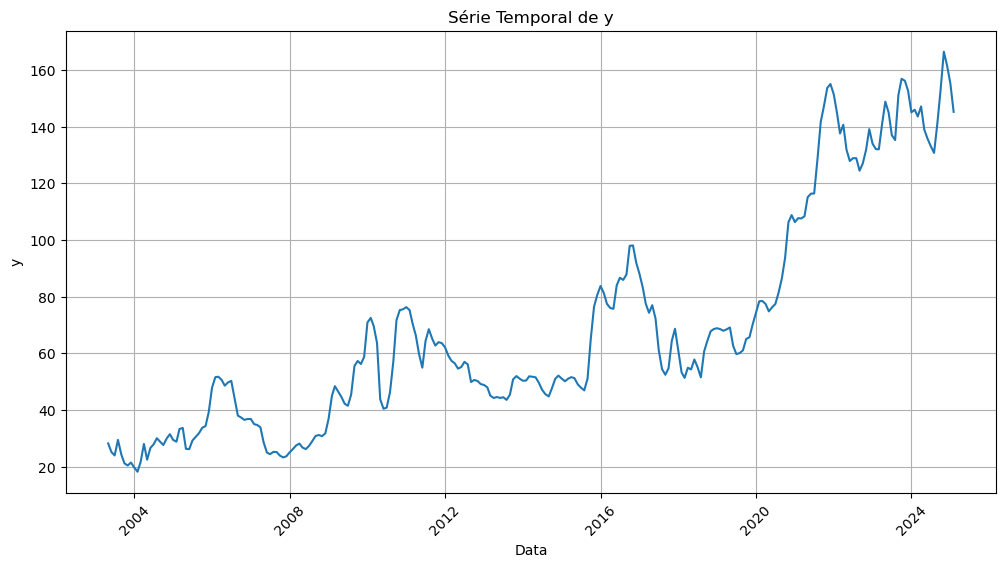

In [19]:
plot_time_series(df_brl, 'y')

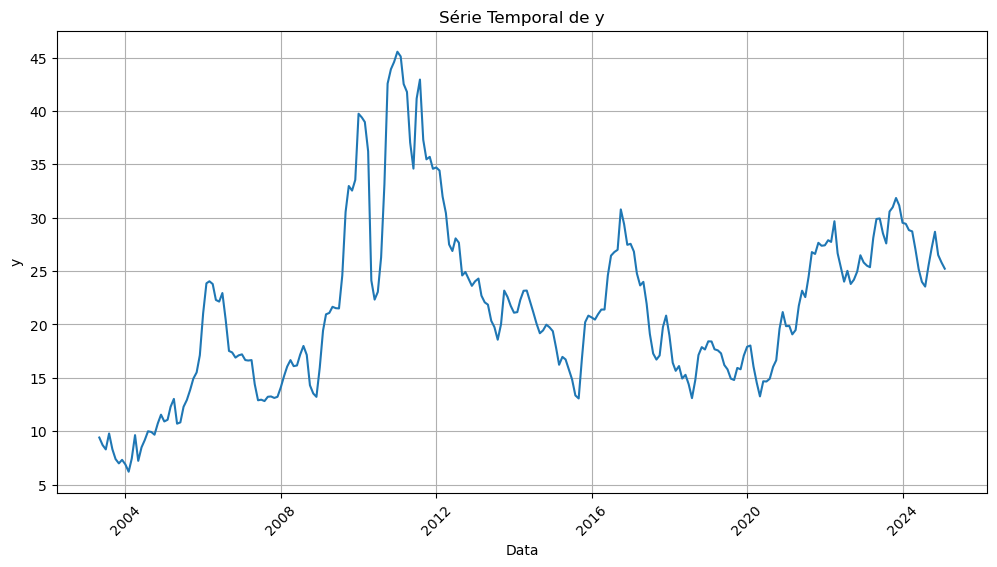

In [20]:
plot_time_series(df_usd, 'y')

In [21]:
save_to_parquet(df_brl, "../data/acucar/acucar_brl.parquet")
save_to_parquet(df_usd, "../data/acucar/acucar_usd.parquet")

Arquivo salvo em: ../data/acucar/acucar_brl.parquet
Arquivo salvo em: ../data/acucar/acucar_usd.parquet
